# Lecture 4 Testing Dependency

Xuanjun (Jason) Gong

## Dependency

Dependency between variables means that knowing one variable gives us information about another variable. 

The conditional probability of $P(A|B)$ not equal to the marginal probability of $P(A)$.

$$P(A|B) \ne P(A)$$
$$P(A \cap B) = P(A)P(B)$$

### Example 

1. Knowing one's height gives information about his weight
2. Knowing one's political affiliation gives information about his media consumption patterns.
3. Knowing one's gender gives information about his/her/their height/weight. 
4. Knowing one's social class gives information about his survival rate under disaster. 

**Denpenceny does not equal to casuation.** 

## Chi Squared test

Suppose we have $N$ balls being randomly dropped into $r$ boxes or classes with probability $p_1, p_2, ..., p_r$ 

We define variable $X_i$ as the number of balls dropped into the $i$th box.

$$X_i \sim Binomial(N,p_i)$$

![box_model](./img/box_model.png)

## Pearson's Theorem

When the number of balls $N$ is large enough, we would have

$$\sum_{i=1}^r\frac{(X_i-Np_i)^2}{Np_i} \sim \chi_{r-1}^2$$

### Proof

Since

$$X_i \sim Binomial(N, p_i)$$

When $N$ is large, accroding to *Central Limit Theorem*, $X_i \sim N(Np_i, Np_i(1-p_i))$

And we will have $\frac{X_i-Np_i}{\sqrt{Np_i(1-p_i)}} \sim Z$

Thus, we define a new variable $Y_i = \frac{X_i-Np_i}{\sqrt{Np_i}} = \sqrt{1-p_i}\frac{X_i-Np_i}{\sqrt{Np_i(1-p_i)}} = \sqrt{1-p_i}Z_i$

Thus $Y_i \sim N(0, 1-p_i)$

And $\sum Y_i^2 \sim \chi_{r-1}^2$

$\sum Y_i^2$ has degree of freedom of $n-1$, because it is constraint by $\sum p_i = 1$

For a full proof, check [here](https://ocw.mit.edu/courses/18-443-statistics-for-applications-fall-2006/resources/lecture11/)

## Goodness of fit test

We can use this property to test the fitness of an empirical distribution (observed data) to a theoritical distribution (expected). 

We specify the null hypothesis and the alternative hypothesis:

$$H_0: p_1 = p_1', p_2 = p_2', ..., p_r=p_r'$$
$$H_1: not\ all\ p_1=p_1', p_2=p_2',..., p_r=p_r'\ holds true$$

We will have 

$$\sum_{i=1}^{r}\frac{(X_i-Np_i')^2}{Np_i'} \sim \chi_{r-1}^2$$

Thus, we can compute the chi squared statistic $\sum_{i=1}^{r}\frac{(X_i-Np_i')^2}{Np_i'}$ and test it against its sampling distribution $\chi_{r-1}^2$

Note that chi squared test is always a **one-tailed test**. Because the chi square statistic is only large when the fit is poor. 

## Chi squared distribution

![chi_squared_test](./img/chi_square.png)

## Chi Square test

Note that $X_i$ is the counts of observed sample in the class $i$, we can denote it as $O_i$, meaning the observed value in class $i$. 

And $Np_i'$ is the expected value of the sample counts in class $i$, assuming null hypothesis is true. Thus we denote $Np_i'$ as $E_i$, meaning expected value in class $i$. 

Then the chi squared statistic can be expressed as

$$\sum \frac{(O_i - E_i)^2}{E_i} \sim \chi_{r-1}^2$$

If $\sum \frac{(O_i - E_i)^2}{E_i}$ is larger than the critical value, then we reject the null hypothesis, and conclude the alternative hypothesis, that the theoritical distribution is not a good fit on the empirical data. 

## Application of Chi Square test

In 2024, Texas population is White: 39.6%, Hispanic or Latino: 39.8%, Black or African American: 13.6%, Asian: 6.0%, Other race: 1%. [Data Source](https://www.census.gov/quickfacts/fact/table/TX#)

In Fall 2024, Texas A&M University student population is White 38,681, Hispanic or Latino 18,346, Black or African American 2,967, Asian 9,714, Other 3,307. [Data Source](https://abpa.tamu.edu/accountability-metrics/student-metrics/student-demographics)

We want to know if the race has an impact on Texas A&M University student enrollment. 

How do we test it?

$$E_i = (\sum O_i)*p_i$$
$$\chi^{2}* = \sum \frac{(O_i - E_i)^2}{E_i}$$
$$p=1-P(\chi_{r-1}^2 \le \chi^{2}*)$$

In [40]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
from matplotlib import pyplot as plt

observed = np.array([38681, 18346, 2967, 9714, 3307])
expected = np.array([0.396, 0.398, 0.136, 0.06, 0.01]) * observed.sum()
chi_squared = (((observed - expected)**2)/expected).sum()


print("Chi Squared Statistic", chi_squared)
print("p value is", 1-stats.chi2.cdf(chi_squared, df=observed.shape[0]-1))

print(stats.chisquare(observed, f_exp=expected))

Chi Squared Statistic 27718.41715437812
p value is 0.0
Power_divergenceResult(statistic=27718.41715437812, pvalue=0.0)


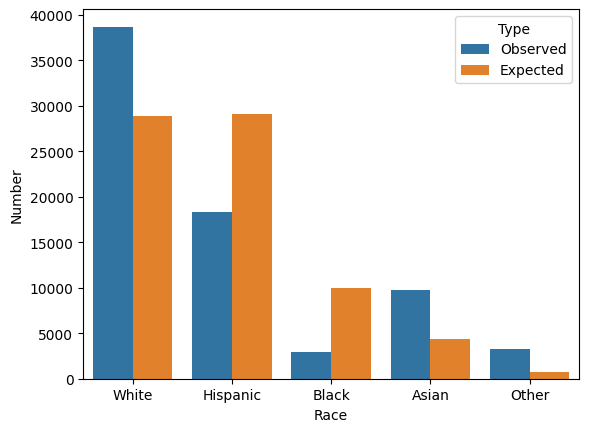

In [23]:
data = pd.DataFrame({"Number": np.concatenate([observed, expected]),
                     "Race": np.tile(["White", "Hispanic", "Black", "Asian", "Other"], 2),
                    "Type": np.repeat(["Observed", "Expected"], 5)})
sns.barplot(data=data, x="Race", y="Number", hue="Type")

plt.show()

## Application of Chi Square test on Continuous Data

One example of applying chi square test is to test if an empirical distribution follows a theoritical distribution such as normal distribution.

![galton_board](./img/galton_board.jpg)

## Goodness of fit test of normality

Consider testing a random variable $X$ following a normal distribution $N(\mu, \sigma^2)$. 

We can collect random samples of $X$, and build a histogram by divide the distribution into $r$ bins, and count the occurance of samples fall into $i$th bin as $O_i$.

Then, we compute the sample mean $\bar{X}=\frac{1}{n}\sum X_i$ and sample variance $s^2 = \frac{1}{n-1}\sum(X_i-\bar{X})^2$. 

Then, we state our null hypothesis and alternative hypothesis.

$$H_0: X \sim N(\bar{X}, s^2)$$
$$H_1: X \not \sim N(\bar{X}, s^2)$$

## Goodness of fit test of normality

Next, assuming $H_0$, we can compute the expected occurance of samples fall into the $i$th bin as $E_i$ based on the probability function of normal distribution as $E_i = Np_i'$. 

Then, we compute the chi square statistic

$$\sum_{i=1}^r \frac{(O_i-E_i)^2}{E_i} \sim \chi_{r-1}^2$$

If the chi square statistic is larger than the critical value, then we reject the null hypothesis and conclude that it does not follow a normal distribution $N(\bar{X}, s^2)$.

## Test of Normality

In practice, chi square test is rarely used for two reasons. 

1. It needs to divide the continuous variable into discrete bins, which can be arbitrary. 
2. It assumes the sample mean and sample variance are good estimators of the true population mean and variance. 

Thus, in practice, we usually use [Shapiro–Wilk test](https://en.wikipedia.org/wiki/Shapiro%E2%80%93Wilk_test) for normality. 

In [4]:
from scipy import stats

x = stats.norm.rvs(loc=5, scale=3, size=100)
y = stats.uniform.rvs(loc=0, scale=1, size=100)

shapiro_test_x = stats.shapiro(x)
print(shapiro_test_x)

shapiro_test_y = stats.shapiro(y)
shapiro_test_y

ShapiroResult(statistic=0.9907810091972351, pvalue=0.7275550961494446)


ShapiroResult(statistic=0.9483953714370728, pvalue=0.0006513685220852494)

## Test of Dependencies with Discrete Variables

Suppose we have two random variables $X$ and $Y$, and we want to know whether or not there is a relationship between the two variables. 

$X$ is of class size $a$, and $Y$ is of class size $b$. 

We collected $N$ samples with paired measures in $X$ and $Y$.

$$(X_1, Y_1), (X_2, Y_2), ..., (X_N, Y_N)$$

Then we can create a contigency table that counts the frequencies for each categories in $X$ and $Y$. 

| X | Y | 1 | 2 | 3 | ... | b | Total |
| --- | --- | --- | --- | --- | --- | --- | --- |
| 1 |   | $N_{11}$ | $N_{12}$ | $N_{13}$ | ... | $N_{1b}$ | $Total_{x=1}$ |
| 2 |   | $N_{21}$ | $N_{22}$ | $N_{23}$ | ... | $N_{2b}$ | $Total_{x=2}$ |
| 3 |   | $N_{31}$ | $N_{23}$ | $N_{33}$ | ... | $N_{3b}$ | $Total_{x=3}$ |
| ... |   | ... | ... | ... | ... | ... | ... |
| a |   | $N_{a1}$ | $N_{a2}$ | $N_{a3}$ | ... | $N_{ab}$ | $Total_{x=a}$ |
| Total|    | $Total_{y=1}$ | $Total_{y=2}$ | $Total_{y=3}$ | ... | $Total_{y=b}$ | $Total_{all}$ |

## Test of Dependencies with Discrete Variables

Given that if $X$ and $Y$ are independent, we would expect that $P(X, Y) = P(X)P(Y)$

Then, we state our null hypothesis:

$$H_0: P(X_i, Y_j) = P(X_i)P(Y_j)\ \ \forall i,j$$
$$H_1: P(X_i, Y_j) \ne P(X_i)P(Y_j)\ \ \exists i,j$$

Assumming $H_0$ is true, we would have expected probability for class $i$ in $X$ and class $j$ in $Y$ as $P(X_i, Y_j) = P(X_i)P(Y_j)$

Then, we can calculate $P(X_i) = \frac{Total_{x=i}}{Total_{all}}$, and $P(Y_j) = \frac{Total_{y=j}}{Total_{all}}$.

Thus the predicted frequencies for class $i$ in $X$ and class $j$ in $Y$ is 

$$E_{ij}=\frac{Total_{x=i}}{Total_{all}}  \frac{Total_{y=j}}{Total_{all}}  Total_{all} = \frac{Total_{x=i}*Total_{y=j}}{Total_{all}}$$

## Test of Dependencies with Discrete Variables

Then we can compute the chi square statistic

$$\sum \frac{(O_{ij}-E_{ij})^2}{E_{ij}} \sim \chi^2_{(a-1)(b-1)}$$

Note that the degree of freedom of the chi square statistic is $(a-1)(b-1)$

This is because the statistic is constraint by $\sum P(X_i) = 1$ and $\sum P(Y_j) = 1$.

Then, we test the chi square statistic against its null distribution $\chi^2_{(a-1)(b-1)}$

## Application of Chi Squared Test of Dependencies

### Titanic Data

Does the survival rate of passagers related to their class?


![titanic](./img/titanic.webp)

In [43]:
titanic = pd.read_csv("data/titanic.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [45]:
contingency_table = pd.crosstab(titanic['Survived'], titanic['Pclass'])
contingency_table

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


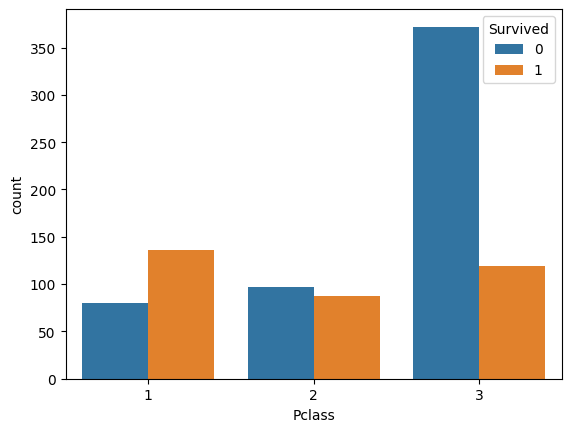

In [77]:
sns.countplot(data=titanic, x="Pclass", hue="Survived")
plt.show()

In [78]:
total_survive = contingency_table.sum(axis=1)
total_class = contingency_table.sum(axis=0)
total = contingency_table.sum().sum()

expected_probability = np.outer(total_survive/total, total_class/total)
expected_frequencies = expected_probability * total
chi_squared = ((expected_frequencies-contingency_table)**2/expected_frequencies).sum().sum()
degree_of_freedom = (contingency_table.shape[0]-1)*(contingency_table.shape[1]-1)
p = 1 - stats.chi2.cdf(chi_squared, df=degree_of_freedom)

print("degree of freedom", degree_of_freedom)
print("chi squared statistic", chi_squared)
print("p value", p)

degree of freedom 2
chi squared statistic 102.88898875696052
p value 0.0


In [79]:
print(stats.chi2_contingency(contingency_table))

(102.88898875696056, 4.549251711298793e-23, 2, array([[133.09090909, 113.37373737, 302.53535354],
       [ 82.90909091,  70.62626263, 188.46464646]]))


## Linear relationship between continuous variables

Previously, we have discovered ways to investigate and statistically testing dependencies between two discrete variables. 

However, most of our data is **continuous**. 

One way to measure the dependencies between continuous variables is to investigate their **linear** relationship.

### What is linear relationship?
Linear relationship describes if one variable increase, another variable increase or decrease. We call it **linear association**. 

**Association does not necessarily indicate causation!**

### Example
1. The relationship between people's height and weight. 
2. The relationship between the number of hours students working on a course and the final grade.
3. The relationship between the temperature and the sales of ice cream. 

## Covariance

We use **Covariance** between two random variables to capture the linear relationship between them.

Covariance between random variable $X$ and $Y$ is defined as:

$$Cov(X,Y)=E[(X-E[X])(Y-E[Y])]$$

![covariance](./img/covariance_1.png)

## Covariance

Covariance is a measure of to which extend does a variable $X$ change, we would expect the change of another variable $Y$.

It measures for 1 unit change of $X$ change from $E[X]$, how much change is expected for variable $Y$ from its expected value $E[Y]$.

$$Let \ X-E[X] = 1$$
$$Cov(X, Y) = E[1(Y-E[Y])] = E[Y-E[Y]]$$

Depends on the relationship between $X$ and $Y$, covariance can have positive or negative value. And it can have a large value or a small value. 

- Positive Covariance: an increase in variable $X$ associated with an increase in variable $Y$. 
- Negative Covariance: an increase in variable $X$ associated with a decrease in variable $Y$. 
- Large Covariance: for a unit change in $X$ from $E[X]$, we expect a large change in $Y$ from $E[Y]$. 
- Small Covariance: for a unit change in $X$ from $E[X]$, we expect a small change in $Y$ from $E[Y]$.

## Properties of Covariance

Covariance $Cov(X, Y)$ have several properties.

- $Cov(aX, Y)=aCov(X,Y)$
- $Cov(X, Y)=Cov(Y,X)$
- $Cov(X+Y, Z)=Cov(X,Z) + Cov(Y,Z)$
- $Cov(X,Y) = 0$, if $X$ and $Y$ are independent.
- $Cov(X+a, Y+b) = Cov(X, Y)$ for $a$ and $b$ as constant.
- $Cov(X, c) = 0$ for $c$ as constant.

The proofs are skipped, but can be easily decrived from the definition of covariance. 

## Covariance

Covariance is a **scale-variant measure**, which means it is sensitive to the changes of the scale of the unit in our measurement of $X$ and $Y$. 

### Example
We measured people's height as a random variable $X$, and people's weight as another random variable $Y$. Suppose the random variable $X$ is measured in unit of of meters, and the unit of measurement of $Y$ is in kg. 

Then we might have the population mean $\bar{X} = 1.7\ meters$, $\bar{Y} = 70 kg$, and population variance $Var(X) = 0.1$, $Var(Y)=10$. We can also measure the linear relationship between $X$ and $Y$ with covariance, such that for each 1 meter increase in people's height from the average height, we expect a $20 kg$ increase in people's weight. Thus, we would have a covariance measurement $Cov(X, Y) = 20$

Now, if we change the scale of the unit of the measurement of $X$ from meters to centimeters, thus, we would have a new variable $X'=\frac{X}{100}$, then for each 1 centimeters increase in $X'$, we would expect $Cov(X', Y)=0.2$.

$$Cov(X',Y)=Cov(\frac{X}{100},Y)=\frac{1}{100}Cov(X,Y)$$

## Covariance

### Why it matters?

If we want to use covariance to measure the linear relationship between $X$ and $Y$, and suppose we have a small or large $Cov(X,Y)$, we do not know if it is because of the strength of the relationship or it is because of the unit of the $X$ or $Y$ being large or small.

So, how to we solve this issue? 

We can standardize both $X$ and $Y$ by centering the $X$ and $Y$ and divide it by its standard deviation, then compute the covariance of the standarized variables $Z_x$ and $Z_y$. This measure is called **Correlation Coefficient**, denoted as $\rho_{x,y}$.

$$Z_x = \frac{X-\mu_x}{\sigma_x}$$
$$Z_y = \frac{Y-\mu_y}{\sigma_y}$$
$$\rho_{x,y} = Cov(Z_x, Z_y)$$

## Correlation Coefficient $\rho_{x,y}$

$$
\begin{align}
\rho_{x,y} &= Cov(Z_x, Z_y) 
\\
&= Cov(\frac{X-\mu_x}{\sigma_x}, \frac{Y-\mu_y}{\sigma_y})
\\
&= \frac{Cov(X-\mu_x, Y-\mu_y)}{\sigma_x \sigma_y}
\\
&= \frac{Cov(X, Y)}{\sigma_x \sigma_y}
\end{align}
$$

Thus, the correlation coefficient $\rho_{x,y}$ is calculated as $Cov(X,Y)$ divided by the product of standard deviations of $X$ and $Y$. 

- $\rho_{x,y}$ is a scale-invariant measurement.
- $\rho_{x,y}$ measures the direction and strength of the linear relationship between $X$ and $Y$. 
- $\rho_{x,y}$ is always between $[-1, 1]$.
- $\rho_{x,y}$ equals to 1 or -1 indicates $X$ and $Y$ are perfectly in the straight line. 
- $\rho_{x,y}$ equals to 0 indicates $X$ and $Y$ have no **linear** relationship between them. 
Note that it does not neccesarily indicates no relationship between $X$ and $Y$. There could be **non-linear relationship** between them. 

## Correlation Coefficient $\rho_{x,y}$

![covariance](./img/correlation_coefficient.jpg)

## Estimator of Covariance

If we have observed $N$ random samples of data $(X_1, Y_1), (X_2, Y_2), (X_3, Y_3), ..., (X_N, Y_N)$. 

We have shown previously that we can estimate the variance of $X$ and $Y$, using the sample variance $S_x^2$ and $S_y^2$, as **unbiased estimator** of population variance $\sigma_x^2$ and $\sigma_y^2$.

$$\hat{\sigma^2_x} = S_x^2 = \frac{\sum (X_i-\bar{X})^2}{n-1}$$
$$\hat{\sigma^2_y} = S_y^2  = \frac{\sum (Y_i-\bar{Y})^2}{n-1}$$

Very similarly, we can use the sample covariance $S_{x,y}$ to estimate the $Cov(X,Y)$ defined as

$$\widehat{Cov(X,Y)} = S_{x,y} = \frac{\sum (X-\bar{X})(Y-\bar{Y})}{n-1}$$

$S_{x,y}$ is an **unbiased estimator** of $Cov(X,Y)$.

Proof shown below (not required material)

## Sample Covariance Proof

Proof of sample covariance $S_{x,y}$ as unbiased estimator of $Cov(X,Y)$

$$
\begin{align}
S_{x,y} &= \frac{\sum (X_i-\bar{X})(Y_i-\bar{Y})}{n-1}
\\
(n-1)S_{x,y} &= \sum (X_i-\bar{X})(Y_i-\bar{Y})
\\
&= \sum [(X_i-\mu_x)(\mu_x-\bar{X})][(Y_i-\mu_y)+(\mu_y-\bar{Y})]
\\
&= \sum[(X_i-\mu_x)(Y_i-\mu_y)+(\mu_x-\bar{X})(Y_i-\mu_y) + (X_i-\mu_x)(\mu_y-\bar{Y}) + (\mu_x-\bar{X})(\mu_y-\bar{Y})]
\\
&= \sum(X_i-\mu_x)(Y_i-\mu_y)+\sum(\mu_x-\bar{X})(Y_i-\mu_y) + \sum(X_i-\mu_x)(\mu_y-\bar{Y}) + \sum(\mu_x-\bar{X})(\mu_y-\bar{Y})
\\
E[(n-1)S_{x,y}] &= E[\sum(X_i-\mu_x)(Y_i-\mu_y)]+E[\sum(\mu_x-\bar{X})(Y_i-\mu_y)] + E[\sum(X_i-\mu_x)(\mu_y-\bar{Y})] + E[\sum(\mu_x-\bar{X})(\mu_y-\bar{Y})]
\end{align}
$$

## Sample Covariance Proof
Now we compute the 4 terms seperately.

$$
\begin{align}
E[\sum(X_i-\mu_x)(Y_i-\mu_y)] &= \sum(E[(X_i-\mu_x)(Y_i-\mu_y)])
\\
&= \sum Cov(X,Y) = n Cov(X,Y)
\\
E[\sum(\mu_x-\bar{X})(Y_i-\mu_y)] &= \sum E[(X_i-\mu_x)(\mu_y-\bar{Y})]
\\
&= -\sum E[(X_i-\mu_x)(\bar{Y}-\mu_y)]
\\
&= -\sum Cov(X_i, \bar{Y})
\\
&= -\sum Cov(X_i, \frac{\sum Y_i}{n})
\\
&= -\sum \frac{1}{n} Cov(X_i, \sum Y_i)
\\
&= -\sum \frac{1}{n}Cov(X_i, Y_i) \text{ Due to $X_i$ is independent from $Y_j$ if $i \ne j$, thus $Cov(X_i, Y_j) = 0$ for $i \ne j$}
\\
&= -Cov(X,Y)
\\
E[\sum(X_i-\mu_x)(\mu_y-\bar{Y})] &= -Cov(X,Y) \text{ Similar to above}
\end{align}
$$

## Sample Covariance Proof

$$
\begin{align}
E[\sum (\mu_x-\bar{X})(\mu_y-\bar{Y})] &= E[\sum (\bar{X}-\mu_x)(\bar{Y}-\mu_y)]
\\
&= \sum E[(\bar{X}-\mu_x)(\bar{Y}-\mu_y)]
\\
&= \sum Cov(\bar{X}, \bar{Y})
\\
&= n Cov(\bar{X}, \bar{Y})
\\
&= n Cov(\frac{\sum X_i}{n}, \frac{\sum Y_i}{n})
\\
&= n \frac{1}{n^2} \sum Cov(X_i, Y_i)
\\
&= \frac{1}{n} n Cov(X,Y)
\\
&= Cov(X,Y)
\end{align}
$$

## Sample Covariance Proof
Sum the 4 terms together, we will have

$$
\begin{align}
E[(n-1)S_{x,y}] &= E[\sum(X_i-\mu_x)(Y_i-\mu_y)]+E[\sum(\mu_x-\bar{X})(Y_i-\mu_y)] + E[\sum(X_i-\mu_x)(\mu_y-\bar{Y})] + E[\sum(\mu_x-\bar{X})(\mu_y-\bar{Y})]
\\
E[(n-1)S_{x,y}] &= nCov(X,Y) - Cov(X,Y) - Cov(X,Y) + Cov(X,Y)
\\
&= (n-1)Cov(X,Y)
\\
E[S_{x,y}] &= Cov(X,Y)
\end{align}
$$

Now we have proven that the expected value of sample covariance $S_{x,y} = \frac{1}{n-1}\sum (X_i-\bar{X})(Y_i-\bar{Y})$ is $Cov(X,Y)$

Thus $S_{x,y}$ is an unbiased estimator of $Cov(X,Y)$

## Estimator of Correlation Coefficient

We know that correlation coefficient is $\rho_{x,y} = \frac{Cov(X,Y)}{\sigma_x, \sigma_y}$, we can substitude the unbiased estimator for $Cov(X,Y)$, $\sigma_x^2$, and $\sigma_y^2$ into this formula. 

Then we have an estimator of correlation coefficient $r_{x,y}$

$$
\begin{align}
\hat{\rho_{x,y}} = r_{x,y} &= \frac{S_{x,y}}{S_x S_y}
\\
&= \frac{\frac{\sum (X_i-\bar{X})(Y_i-\bar{Y})}{n-1}}{\sqrt{\frac{\sum (X_i-\bar{X})^2}{n-1}}\sqrt{\frac{\sum (Y_i-\bar{Y})^2}{n-1}}}
\\
&= \frac{\sum (X_i-\bar{X})(Y_i-\bar{Y})}{\sqrt{\sum (X_i-\bar{X})^2 \sum (Y_i-\bar{Y})^2}}
\end{align}
$$


## Estimator of Correlation Coefficient

By further transformation of the equation, we can also have

$$
\begin{align}
r_{x,y} &= \frac{\sum X_i Y_i - n\bar{X}\bar{Y}}{(n-1)S_x S_y}
\\
&= \frac{1}{n-1} \sum (\frac{X_i-\bar{X}}{S_x})(\frac{Y_i-\bar{Y}}{S_y})
\end{align}
$$

Note that $Z_{x, i} = \frac{X_i-\bar{X}}{S_x}$, and $Z_{y,i}=\frac{Y_i-\bar{Y}}{S_y}$

We can have

$$
r_{x,y} = \frac{1}{n-1} \sum Z_{x,i} Z_{y,i}
$$

Sample correlation coefficient is the sum of the product of the standardized samples divided by $n-1$.

## Sample Correlation Coefficient

The sample correlation coefficient $r_{x,y}$, also called **Pearson's correlation coefficient** is a **descriptive statistic** measuring the **direction** and the **strength** of the linear relationship between two random variables $X$ and $Y$. 

$r_{x,y}$ is an **biased** estimator of correlation coeffcient $\rho_{x,y}$, but it will approximate $\rho_{x,y}$ when the sample size $n$ is large. 

$r_{x,y}$ is a **symmetric** measure, meaning $r_{x,y} = r_{y,x}$

A visualization of sample correlation coefficient is through **scatter plot**.

## Scatterplot

<div>
<img src="./img/scatter_plot.png" width="500"/>
</div>

## Statistical Testing on Correlation Coefficient

Usually, correlation coefficient $r_{x,y}$ serves as a descriptive statistic to describe the linear relationship between $X$ and $Y$. 

But, similar to chi squared test, we need a statistical inference tool to test the significance of the relationship or dependencies between two continuous random variables $X$ and $Y$. 

In order to do so, we need to make additional assumptions about the distributions of $X$ and $Y$.

We need to assume $X$ and $Y$ are **bivariate normal distribution**, where the distribution of $X$ and $Y$ looks like a **ellipse**. 

## Bivariate Normal Distribution
![bivariate_normal_1](./img/bivariate_normal_1.png)

## Bivariate Normal Distribution

We can use a 3-d density function or a 2-d contour density plot to visualize this bivariate normal distribution.

![bivariate_normal_2](./img/bivariate_normal_2.png)

## Inference on Correlation Coefficient

When $X$ and $Y$ follows a uncorrelated bivariate normal distribution ($\rho_{x,y}=0$). The sample correlation coefficient $r_{x,y}$ has a sample variance $S_{r}$

$$S_r = \frac{1-r_{x,y}^2}{n-2}$$

We state

$$
H_0: \rho_{x,y} = 0
\\
H_1: \rho_{x,y} \ne 0
$$

Thus, we can compute the $t$ statistic of correlation coefficient as

$$
t = \frac{r_{x,y}-\rho_{x,y}}{\sqrt{\frac{1-r_{x,y}^2}{n-2}}} = r_{x,y}\sqrt{\frac{n-2}{(1-r_{x,y})^2}} \sim t_{n-2}
$$

Thus, we can apply the single sample $t$ test on the constructed $t$ statistic with the null sampling distribution $t_{n-2}$.

## Inference on Correlation Coefficient

Note that statistical testing on Pearson's correlation coefficient $r_{x,y}$ using t test is a **parameteric** test, with a set of assumptions (i.e., bivariate normal distribution of $X$ and $Y$). 

What if these assumption is not satisfied? 

1. $X$ and $Y$ are not continuous but ordinal.
2. $X$ or $Y$ are not normal distributed.
3. $X$ or $Y$ contains outliers (extreme large or small valued samples away from sample mean).

We need to use **non-parametric** test such as **Spearman Correlation Coefficient** test or **Kendall Correlation Coefficient** test. 

Other non-parametric test exists by constructing an empirical null distribution for pearson's $r_{x,y}$ using methods such as **permutation** or **bootstrap**. 

## Data Example

### World Happiness Report Dataset (2019

<div>
<img src="./img/world_happiness_report.webp" width="300"/>
</div>


In [81]:
happy_df = pd.read_csv("./data/world_happiness_report_2019.csv")
happy_df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


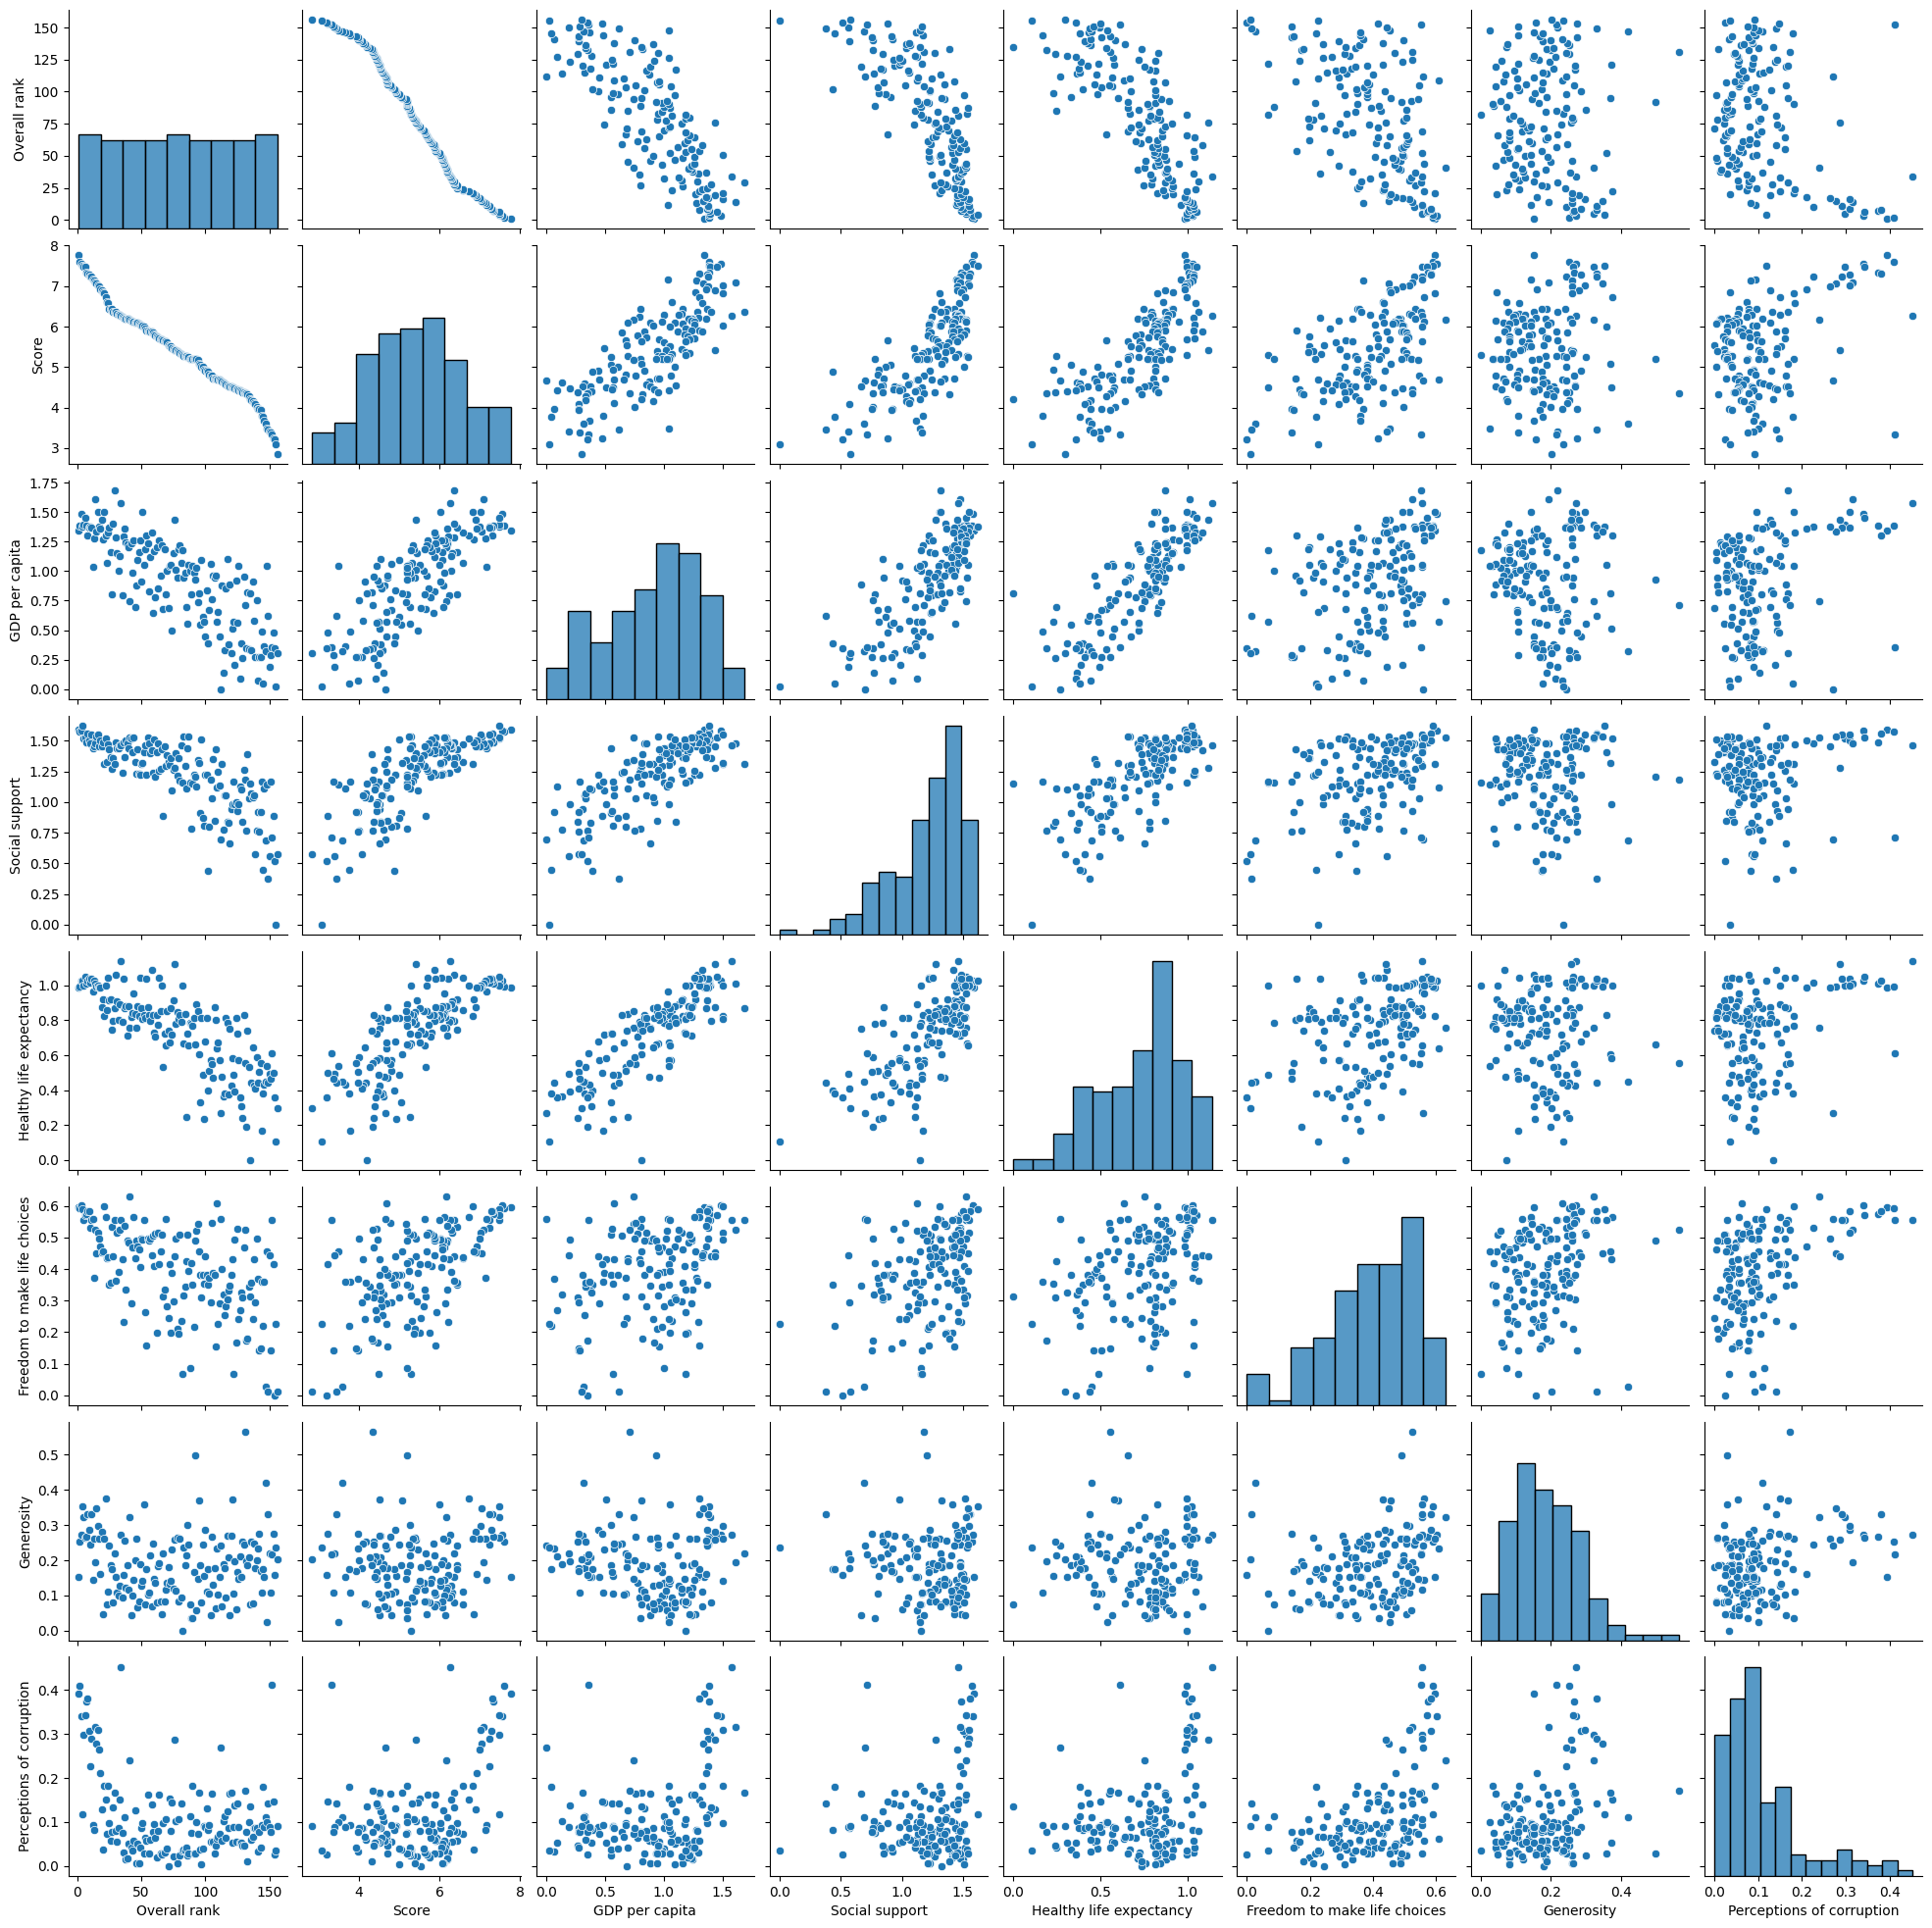

In [85]:
sns.pairplot(data=happy_df, 
             vars=["Overall rank", "Score", "GDP per capita", "Social support", 
                   "Healthy life expectancy", "Freedom to make life choices", 
                   "Generosity", "Perceptions of corruption"])
plt.show()

In [89]:
corr_matrix = happy_df[["Overall rank", "Score", "GDP per capita", "Social support", 
                       "Healthy life expectancy", "Freedom to make life choices", 
                       "Generosity", "Perceptions of corruption"]].corr()
corr_matrix

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Overall rank,1.000000,-0.989096,-0.801947,-0.767465,-0.787411,-0.546606,-0.047993,-0.351959
Score,-0.989096,1.000000,0.793883,0.777058,0.779883,0.566742,0.075824,0.385613
GDP per capita,-0.801947,0.793883,1.000000,0.754906,0.835462,0.379079,-0.079662,0.298920
Social support,-0.767465,0.777058,0.754906,1.000000,0.719009,0.447333,-0.048126,0.181899
Healthy life expectancy,-0.787411,0.779883,0.835462,0.719009,1.000000,0.390395,-0.029511,0.295283
Freedom to make life choices,-0.546606,0.566742,0.379079,0.447333,0.390395,1.000000,0.269742,0.438843
Generosity,-0.047993,0.075824,-0.079662,-0.048126,-0.029511,0.269742,1.000000,0.326538
Perceptions of corruption,-0.351959,0.385613,0.298920,0.181899,0.295283,0.438843,0.326538,1.000000


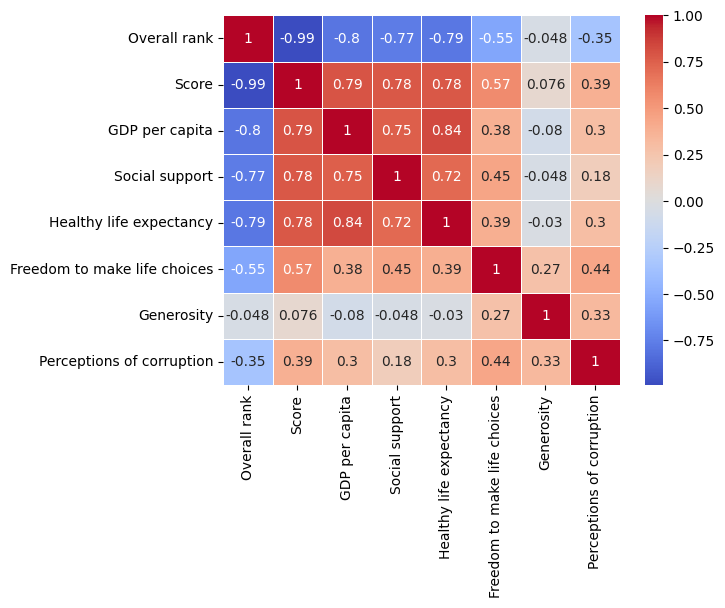

In [96]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.show()

## Calculate of Correlation Coefficient

Suppose we want to calculate the correlation coefficient to measure the linear relationship between Happiness Score and the GDP. 

We can use the fomula (derived previously)

$$
r_{x,y} = \frac{\sum X_i Y_i - n\bar{X} \bar{Y}}{(n-1)S_x S_y}
$$

In [106]:
sample_size = happy_df.shape[0]
happiness_sample_mean = happy_df["Score"].mean()
gdp_sample_mean = happy_df["GDP per capita"].mean()
happiness_sample_variance = happy_df["Score"].var()
gpd_sample_variance = happy_df["GDP per capita"].var()
happiness_sample_standard_deviation = np.sqrt(happiness_sample_variance)
gpd_sample_standard_deviation = np.sqrt(gpd_sample_variance)
sum_of_product = np.sum(happy_df["Score"] * happy_df["GDP per capita"])

correlation_coefficient = (sum_of_product - sample_size*happiness_sample_mean*gdp_sample_mean)/\
((sample_size-1)*happiness_sample_standard_deviation*gpd_sample_standard_deviation)

print("Correlation Coefficient", correlation_coefficient)

Correlation Coefficient 0.7938828678781247


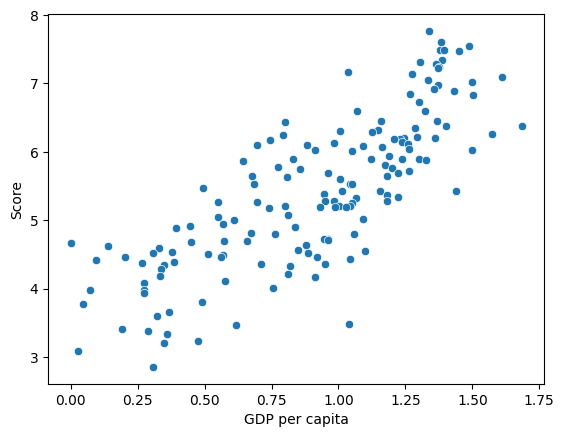

In [140]:
sns.scatterplot(data=happy_df, x="GDP per capita", y="Score")
plt.show()

## Inference on Correlation Coefficient

We can use the `pearsonr` function in the `scipy` package `stats` module.

Note that by default, `pearsonr` test is a two-tailed test. For one-tailed test, you need to divide the $p$ value by 2. 

Note that the `pearsonr` function did not use the $t$ test we described before. Rather, it used the exact distribution of $r_{x,y}$ when assuming $\rho_{x,y}=0$. The t testing method we mentioned above is an approximation of the exact distribution of $r_{x,y}$ when sample size is large. 

For more details, refer to the [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html).

In [121]:
pearsonr_test = stats.pearsonr(happy_df["GDP per capita"], happy_df["Score"])
print("Correlation Coefficient:", pearsonr_test[0])
print("p value", pearsonr_test[1])

Correlation Coefficient: 0.7938828678781275
p value 4.315480913319589e-35


## Non-parametric test of Correlation

When the distributions between $X$ and $Y$ are not following a bivariate normal distribution. The inference is utimately flawed because the basic assumption has been violated. 

When this happy (by checking the scatterplot or better by applying normality testing)

We can use Spearman's correlation coefficient or Kendall rank correlation coefficient

Spearman's correlation coefficient and Kendall rank correlation coefficient transform variable $X$ and $Y$ into their rank by arranging the values from the smallest to the largest, and then compute the metrics on the rank data rather than the original continous data. 

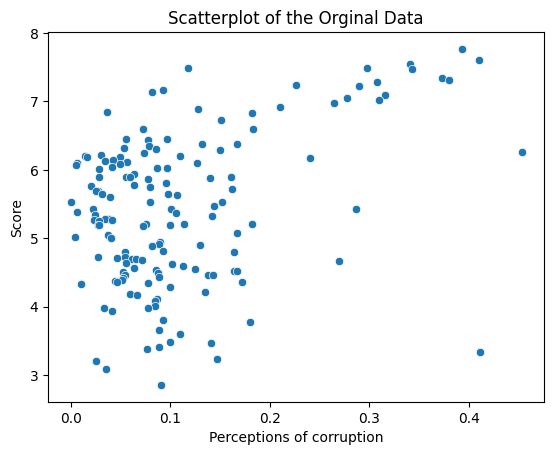

In [142]:
sns.scatterplot(data=happy_df, x="Perceptions of corruption", y="Score")
plt.title("Scatterplot of the Orginal Data")
plt.show()

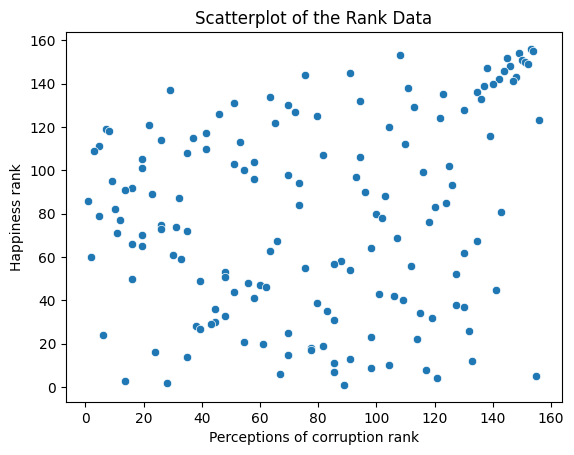

In [143]:
sns.scatterplot(x=happy_df["Perceptions of corruption"].rank(), y=happy_df["Score"].rank())
plt.xlabel("Perceptions of corruption rank")
plt.ylabel("Happiness rank")
plt.title("Scatterplot of the Rank Data")
plt.show()

In [129]:
pearsonr_test = stats.pearsonr(happy_df["Perceptions of corruption"], happy_df["Score"])
print("Correlation Coefficient:", pearsonr_test[0])
print("p value", pearsonr_test[1])

Correlation Coefficient: 0.38561307086647867
p value 6.65401093847035e-07


In [131]:
spearmanr_test = stats.spearmanr(happy_df["Perceptions of corruption"], happy_df["Score"])
print("Correlation Coefficient:", spearmanr_test[0])
print("p value", spearmanr_test[1])

Correlation Coefficient: 0.21734842224916787
p value 0.006420238104986958


In [132]:
kendalltau_test = stats.kendalltau(happy_df["Perceptions of corruption"], happy_df["Score"])
print("Correlation Coefficient:", kendalltau_test[0])
print("p value", kendalltau_test[1])

Correlation Coefficient: 0.14097398297268365
p value 0.00917803290768583
